In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
directoryPath = '1_Data\\1_Data\\group2\\classification\\nonLinearlySeparable'

In [4]:
df_nonLinear_train = pd.DataFrame(columns=['col1','col2','className'])
df_nonLinear_test = pd.DataFrame(columns=['col1','col2','className'])
for i in range(1,3):
    filePath = directoryPath + '\\class' + str(i) + '_train.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_nonLinear_train.loc[len(df_nonLinear_train)] = row 
for i in range(1,3):
    filePath = directoryPath + '\\class' + str(i) + '_test.txt'
    with open(filePath,'r') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_nonLinear_test.loc[len(df_nonLinear_test)] = row 
df_nonLinear_train['col1'] = df_nonLinear_train['col1'].astype(float)
df_nonLinear_train['col2'] = df_nonLinear_train['col2'].astype(float)
df_nonLinear_train['className'] = df_nonLinear_train['className'].astype(int)

df_nonLinear_test['col1'] = df_nonLinear_test['col1'].astype(float)
df_nonLinear_test['col2'] = df_nonLinear_test['col2'].astype(float)
df_nonLinear_test['className'] = df_nonLinear_test['className'].astype(int)


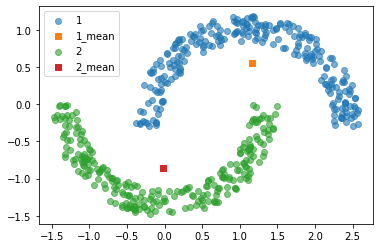

In [5]:
def data_plot(df):
    groups = df.groupby('className')

    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
        mean_label = str(name) + '_mean'
        plt.scatter(x = group.col1.mean(), y = group.col2.mean(), marker='s', label = mean_label, alpha=1)
    plt.legend()
    plt.show()
data_plot(df_nonLinear_train)

In [5]:
nn_classifier = KNeighborsClassifier(n_neighbors = 1)

X = df_nonLinear_train.iloc[:,:-1]
y = df_nonLinear_train.iloc[:, -1]

nn_classifier.fit(X, y)
y_pred = nn_classifier.predict(df_nonLinear_test.iloc[:,:-1])
#predict the accuracy of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(df_nonLinear_test.iloc[:,-1], y_pred)

1.0

In [10]:
#defining the boundaries of the domain
def decision_plot(df, classifier, title = "Traing Data"):   
    min1, max1 = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
    min2, max2 = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
    print(min1,max1,min2,max2)
    #define all the range
    
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    yhat = classifier.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contour(xx, yy, zz, colors='k')
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)
    groups = df.groupby('className')
    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()

-2.473 3.5737 -2.4755000000000003 2.1860999999999997


c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


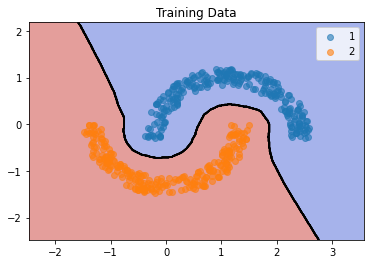

In [11]:
#Decision Plot of all training data imposed
decision_plot(df_nonLinear_train, nn_classifier, title = "Training Data")

-2.4760999999999997 3.5741 -2.4645 2.1905


c:\Users\Sadat Zubin Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


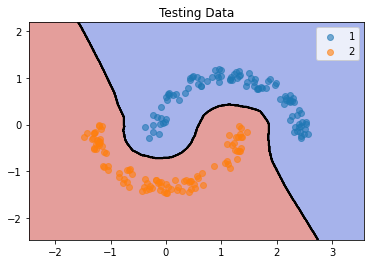

In [12]:
decision_plot(df_nonLinear_test, nn_classifier, title = "Testing Data")

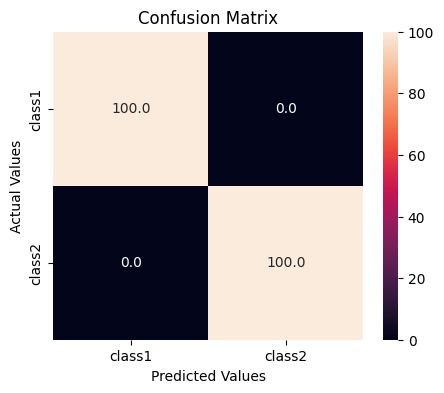

In [11]:
def plot_confusion_matrix(df_test, y_pred):
    cm = confusion_matrix(df_test.iloc[:,-1].values,y_pred)
    cm_df = pd.DataFrame(cm, index = ['class1','class2'],  columns = ['class1','class2'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, fmt='.1f', annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

plot_confusion_matrix(df_nonLinear_test, y_pred)

In [12]:
def plot_mean_matrix(df_test, y_pred):
    table_df = pd.DataFrame(index=['Accuracy Score','Mean Precision','Mean Recall','Mean F1'], 
                        columns=['Value'])

    y_true = df_test.iloc[:, -1].values

    accuracy = accuracy_score(y_true, y_pred)
    table_df.loc['Accuracy Score', 'Value'] = accuracy

    mean_precision = precision_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Precision', 'Value'] = mean_precision

    mean_recall = recall_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Recall', 'Value'] = mean_recall

    mean_f1 = f1_score(y_true, y_pred, average='macro')
    table_df.loc['Mean F1', 'Value'] = mean_f1
    
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Value']]
    fig, ax = plt.subplots(figsize=(4, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

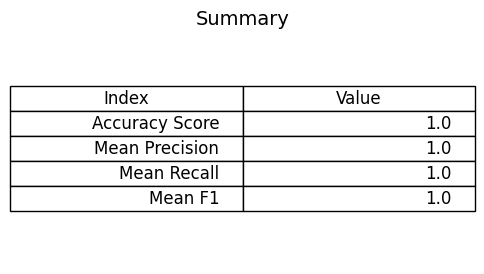

In [13]:
plot_mean_matrix(df_nonLinear_test, y_pred)

In [14]:
def plot_metric_summary(df_test, y_pred):
    table_df = pd.DataFrame(columns=['Class1','Class2'], 
                        index=['Precision','Recall', 'F1 Score'])
    y_true = df_test.iloc[:, -1].values

    precision_per_class = precision_score(y_true, y_pred, average=None)
    for i, precision in enumerate(precision_per_class):
        table_df.loc['Precision', f'Class{i+1}'] = precision

    recall_per_class = recall_score(y_true, y_pred, average=None)
    for i, recall in enumerate(recall_per_class):
        table_df.loc['Recall', f'Class{i+1}'] = recall

    f1_per_class = f1_score(y_true, y_pred, average=None)
    for i, f1 in enumerate(f1_per_class):
        table_df.loc['F1 Score', f'Class{i+1}'] = f1    
     
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Class1','Class2']]
    fig, ax = plt.subplots(figsize=(6, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

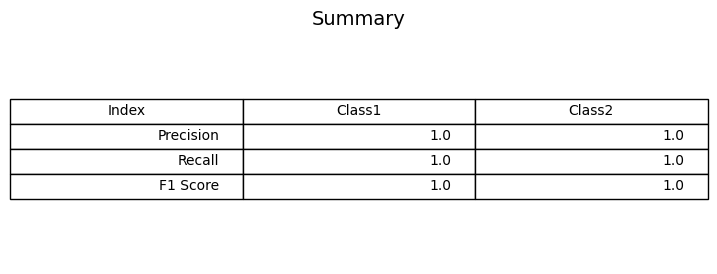

In [15]:
plot_metric_summary(df_nonLinear_test, y_pred)

# KNN

Optimal k value: 1


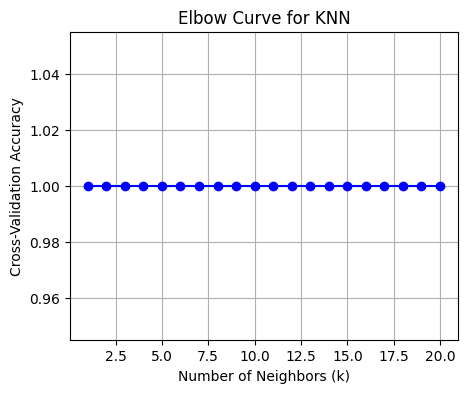

In [16]:
X = df_nonLinear_train.iloc[:,:-1]
y = df_nonLinear_train.iloc[:,-1]

k_values = range(1, 21)  

cross_validation_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  
    cross_validation_score.append(scores.mean())


plt.figure(figsize=(5, 4))
plt.plot(k_values, cross_validation_score, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Find the optimal k value (the one with the highest accuracy)
optimal_k = k_values[np.argmax(cross_validation_score)]
print(f'Optimal k value: {optimal_k}')

plt.show()


# Reference Template Based Classifier

In [17]:
class ReferenceTemplateClassifier():
    def __init__(self):
        self.mean = []
    
    def fit(self, df):
        groups = df.groupby('className')
        for name, group in groups:
            mean_value = (group['col1'].mean(), group['col2'].mean(), name)
            self.mean.append(mean_value)
        return self.mean

    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for mean_tuple in self.mean:
                distance = np.sqrt((row[0] - mean_tuple[0])**2 + (row[1] - mean_tuple[1])**2)
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = mean_tuple[2]
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [18]:
referenceTemplateClassifier = ReferenceTemplateClassifier()
referenceTemplateClassifier.fit(df_nonLinear_train)
test_data = df_nonLinear_test[['col1','col2']].to_numpy()
y_pred = referenceTemplateClassifier.predict(test_data)

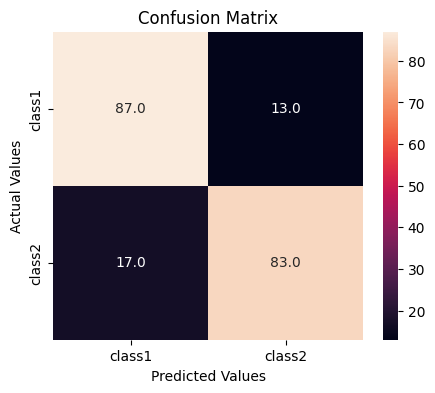

In [19]:
plot_confusion_matrix(df_nonLinear_test, y_pred)

In [16]:
decision_plot(df_nonLinear_train, referenceTemplateClassifier)

NameError: name 'decision_plot' is not defined

-2.4760999999999997 3.5741 -2.4645 2.1905


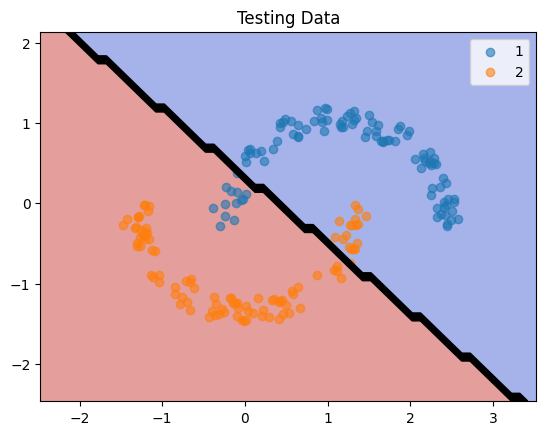

In [21]:
decision_plot(df_nonLinear_test, referenceTemplateClassifier, title = "Testing Data")

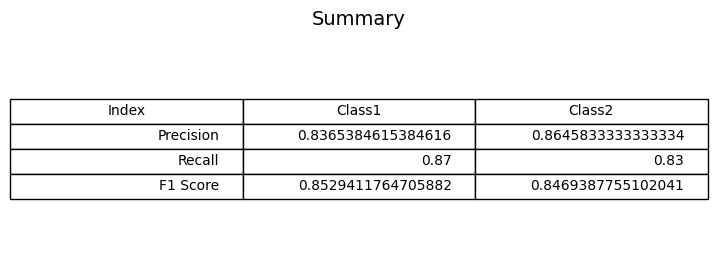

In [22]:
plot_metric_summary(df_nonLinear_test, y_pred)

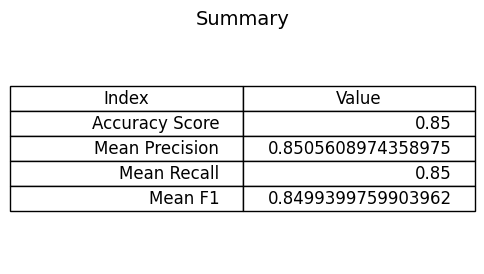

In [23]:
plot_mean_matrix(df_nonLinear_test, y_pred)

### Reference template with mean vector and covariance

In [24]:
class ReferenceTemplateClassifier_Mahalodian():
    def __init__(self):
        self.mean = {}
        self.covariance = {}
        self.className = []
    
    def fit(self, df):
        groups = df.groupby('className')
        self.className = df.className.unique()
        for name, group in groups:
            self.mean[name] = group[['col1','col2']].mean().to_numpy()
            self.covariance[name] = group[['col1','col2']].cov().to_numpy()
        
    
    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for name in self.className:
                distance = np.sqrt(
                    np.dot(np.dot((row - self.mean[name]).T, np.linalg.inv(self.covariance[name])), (row - self.mean[name]))
                )
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = name
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [25]:
rtc = ReferenceTemplateClassifier_Mahalodian()
rtc.fit(df_nonLinear_train)
test_data = df_nonLinear_test[['col1','col2']].to_numpy()
y_pred = rtc.predict(test_data)

Decision plot

-2.473 3.5737 -2.4755000000000003 2.1860999999999997


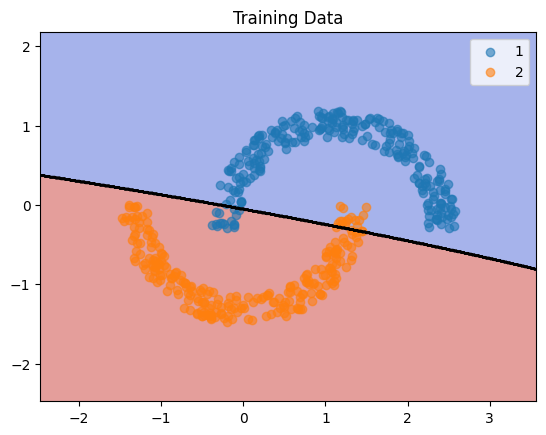

In [30]:
decision_plot(df_nonLinear_train, rtc, title="Training Data")

-2.4760999999999997 3.5741 -2.4645 2.1905


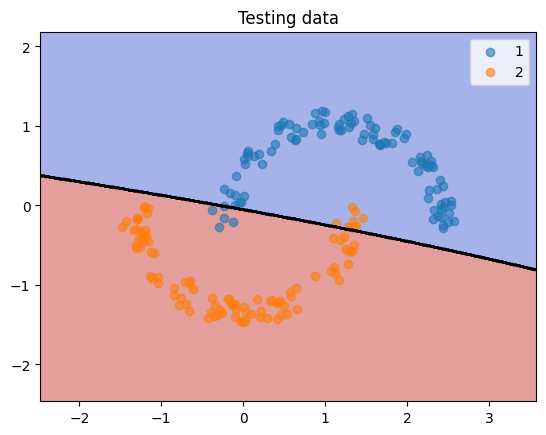

In [31]:
decision_plot(df_nonLinear_test, rtc, title="Testing data")

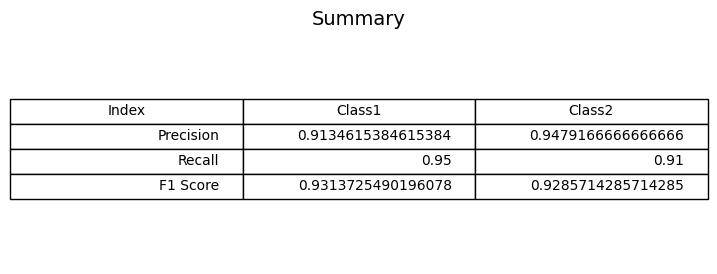

In [33]:
plot_metric_summary(df_nonLinear_test, y_pred)

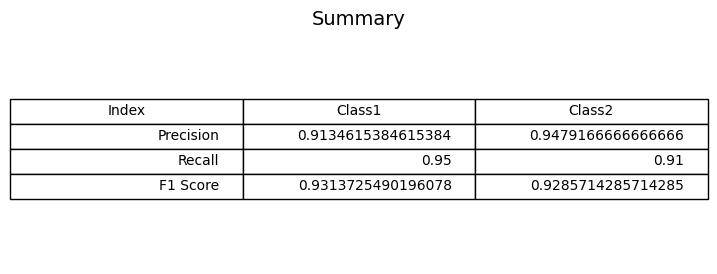

In [32]:
plot_metric_summary(df_nonLinear_test, y_pred)

In [6]:
import utils.decisionPlots
from utils.decisionPlots import decision_subplots   
import importlib
importlib.reload(utils.decisionPlots)

<module 'utils.decisionPlots' from 'd:\\Documents_D_Drive\\~NIT study\\NIT-Goa\\Fourth year\\Lectures\\Sem 7\\ML\\CS401-IML-Assignment\\utils\\decisionPlots.py'>

### Bayes Classifier- Unimodal Gaussian Density

In [7]:
from classifiers.BayesClassifier import *

bbc = BivariateBayesClassifier()

In [8]:
BayesCovarianceCases = [['same','diagonal'],['same','full','classwise'],['same','full','entire'],['different','diagonal'],['different','full']]

4. Decision region plot for all the classes together with the training data superposed

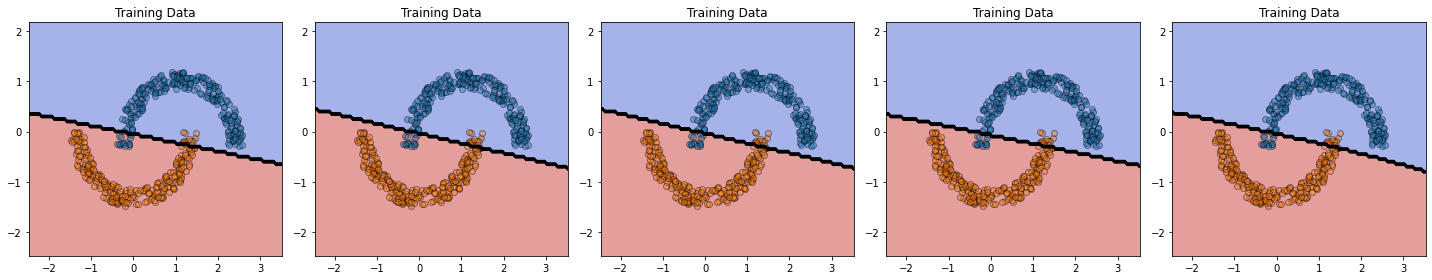

In [12]:
fig, axes = plt.subplots(1,5,figsize=(20,4))

for case in range(len(BayesCovarianceCases)):
    bbc.fit(df_nonLinear_train,*BayesCovarianceCases[case])
    decision_subplots(axes[case],df_nonLinear_train,bbc,df_nonLinear_train,title=f"Training Data",steps=0.05)
plt.tight_layout()
plt.show()

5. Decision region plot for all the classes together with the testing data superimposed 

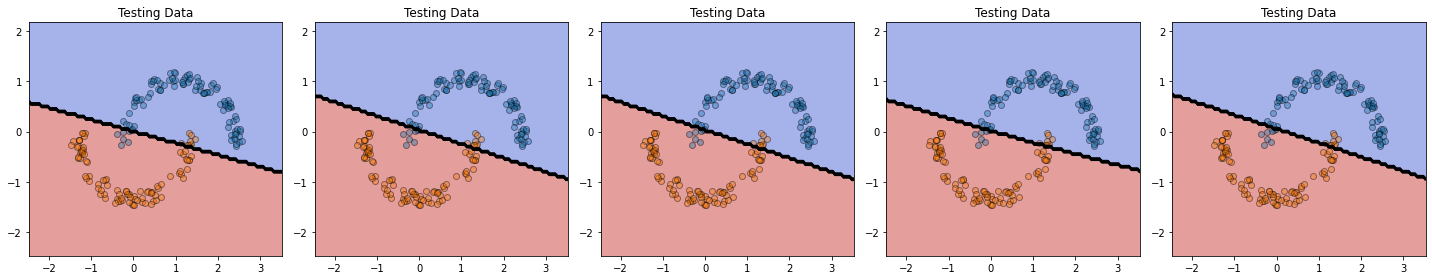

In [14]:
fig, axes = plt.subplots(1,5,figsize=(20,4))

for case in range(len(BayesCovarianceCases)):
    bbc.fit(df_nonLinear_test,*BayesCovarianceCases[case])
    decision_subplots(axes[case],df_nonLinear_test,bbc,df_nonLinear_train,title=f"Testing Data",steps=0.05)
plt.tight_layout()
plt.show()

3. Decision  region  plot  for  every  pair  of  classes  with  the  respective  training  data 
superimposed

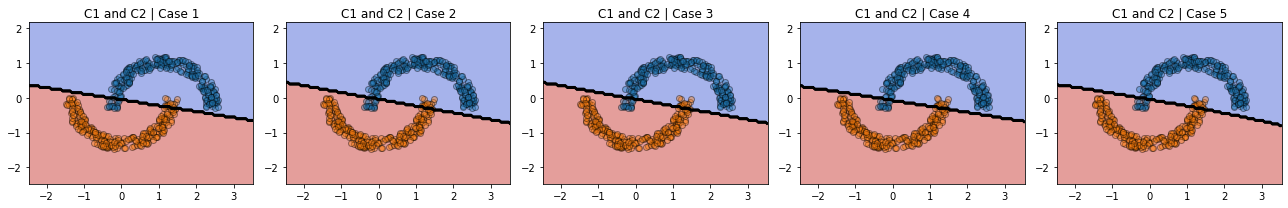

In [15]:
from itertools import combinations
pairs = list(combinations(df_nonLinear_train.className.unique(), 2))

fig, axes = plt.subplots(len(pairs), 5, figsize=(18, 3))

for pair_idx, pair in enumerate(pairs):
    dataframe = df_nonLinear_train[(df_nonLinear_train.className == pair[0]) | (df_nonLinear_train.className == pair[1])]
    for case in range(5):
        pairwise_classifier = BivariateBayesClassifier()
        pairwise_classifier.fit(dataframe,*BayesCovarianceCases[case])
        if len(pairs) == 1:
            current_ax = axes[case]  # Access the subplot directly
        else:
            current_ax = axes[pair_idx, case]
        decision_subplots(current_ax, dataframe, pairwise_classifier, df_nonLinear_train, title = f"C{pair[0]} and C{pair[1]} | Case {case+1}",steps=0.05)

plt.tight_layout()
plt.show()